In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.drop('Gender', axis = 1, inplace = True)

In [4]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


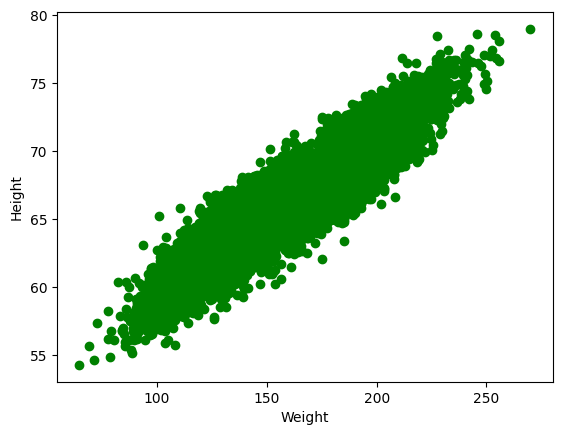

In [9]:
## plot a scatter graph to check the linearity
plt.scatter(df['Weight'], df['Height'], color='green')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [10]:
X = df[['Weight']]
y = df['Height']

In [11]:
X.shape, y.shape

((10000, 1), (10000,))

In [ ]:
## train test and split
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
X_train.shape, X_test.shape

((8000, 1), (2000, 1))

In [24]:
## standardize the dataset
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
X_train_scaled

array([[-1.26850469],
       [ 1.49950187],
       [ 1.23435095],
       ...,
       [-0.14126217],
       [ 0.56364485],
       [-0.34162408]], shape=(8000, 1))

In [27]:
X_test_scaled

array([[ 0.36793009],
       [ 1.05598138],
       [ 0.27747375],
       ...,
       [-1.1281409 ],
       [ 0.81914676],
       [-1.83691726]], shape=(2000, 1))

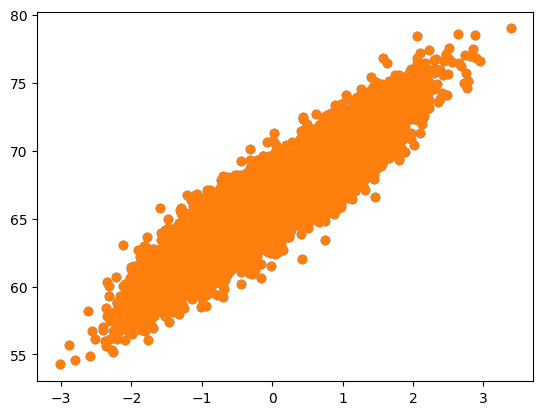

In [34]:
plt.scatter(X_train_scaled, y_train)
plt.show()

In [28]:
## Apply the linear regression
from sklearn.linear_model import LinearRegression

In [29]:
regression = LinearRegression()

In [31]:
regression.fit(X_train, y_train)

LinearRegression()

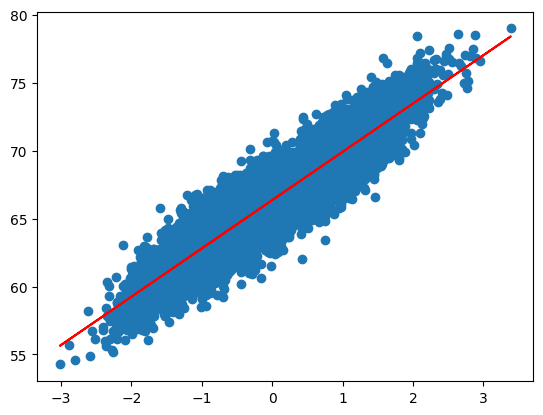

In [36]:
## plot the best fit line
plt.scatter(X_train_scaled, y_train)
plt.plot(X_train_scaled, regression.predict(X_train_scaled), color='r')
plt.show()

In [37]:
## coefficient and intercept
print('Coefficient : ', regression.coef_)
print('Intercept : ', regression.intercept_)

Coefficient :  [3.55479288]
Intercept :  66.3596814074891


### prediction of train data
predicted height output= intercept +coef_(Weights)

y_pred_train =66.35 + 3.55(X_train)

### prediction of test data
predicted height output= intercept +coef_(Weights)

y_pred_test =66.35 + 3.55(X_test)

In [38]:
y_pred_test = regression.predict(X_test)

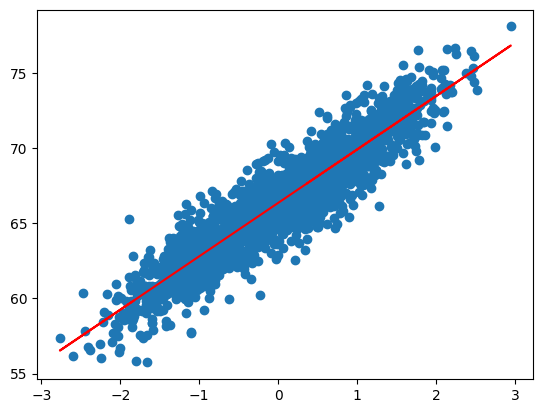

In [39]:
## plot the best fit line
plt.scatter(X_test_scaled, y_test)
plt.plot(X_test_scaled, regression.predict(X_test_scaled), color='r')
plt.show()

In [40]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)

0.8578120230894554
